In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data analysis and preparation

In [2]:
df = pd.read_csv("Salary_Data.csv")
print(df.columns)
df.head()

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
columns = ['age', 'gender', 'education_level', 'job_title', 'experience',
       'salary']
df.columns = columns
print(df.shape)
print(df.dtypes)
df.isna().sum()

(6704, 6)
age                float64
gender              object
education_level     object
job_title           object
experience         float64
salary             float64
dtype: object


age                2
gender             2
education_level    3
job_title          2
experience         3
salary             5
dtype: int64

In [4]:
df = df.dropna(how='all')
df.shape

(6702, 6)

In [5]:
df.age = df.age.fillna(df.age.mean())
df.experience = df.experience.fillna(df.experience.mean())
df.salary = df.salary.fillna(df.salary.mean())
df.isna().sum()

age                0
gender             0
education_level    1
job_title          0
experience         0
salary             0
dtype: int64

In [6]:
df['education_level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", nan, 'High School', 'phD'], dtype=object)

In [7]:
df['education_level'] = df['education_level'].str.strip().str.lower()
df['education_level'] = df['education_level'].replace({
    "bachelor's": "bachelor's",
    "bachelor's degree": "bachelor's",
    "master's": "master's",
    "master's degree": "master's",
    "phd": "phd",
    "high school": "high school"
})
df['education_level'].unique()

array(["bachelor's", "master's", 'phd', nan, 'high school'], dtype=object)

In [8]:
df['education_level'] = df['education_level'].fillna('unknown')
df['education_level'].unique()

array(["bachelor's", "master's", 'phd', 'unknown', 'high school'],
      dtype=object)

In [9]:
df['education_level'] = df['education_level'].map({
    'unknown': 0,
    'high school': 1,
    "bachelor's": 2, 
    "master's": 3, 
    'phd': 4
})
df.head()

,age,gender,education_level,job_title,experience,salary
0,32.0,Male,2,Software Engineer,5.0,90000.0
1,28.0,Female,3,Data Analyst,3.0,65000.0
2,45.0,Male,4,Senior Manager,15.0,150000.0
3,36.0,Female,2,Sales Associate,7.0,60000.0
4,52.0,Male,3,Director,20.0,200000.0


In [10]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df['gender'] = df['gender'].map({
    'Male': 0, 
    'Female': 1, 
    'Other': 2
})
df.head()

,age,gender,education_level,job_title,experience,salary
0,32.0,0,2,Software Engineer,5.0,90000.0
1,28.0,1,3,Data Analyst,3.0,65000.0
2,45.0,0,4,Senior Manager,15.0,150000.0
3,36.0,1,2,Sales Associate,7.0,60000.0
4,52.0,0,3,Director,20.0,200000.0


In [12]:
print(df.shape)
print(df.isnull().sum())
print(df.dtypes)

(6702, 6)
age                0
gender             0
education_level    0
job_title          0
experience         0
salary             0
dtype: int64
age                float64
gender               int64
education_level      int64
job_title           object
experience         float64
salary             float64
dtype: object


In [13]:
df['gender'] = df['gender'].astype(float)
df['education_level'] = df['education_level'].astype(float)
df.dtypes

age                float64
gender             float64
education_level    float64
job_title           object
experience         float64
salary             float64
dtype: object

# Building a model and choosing the best one

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error, r2_score, confusion_matrix
from scipy.stats import skew, kurtosis, iqr
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor

In [15]:
X = df.drop(['salary', 'job_title'], axis=1)
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler.fit_transform(y_test.values.reshape(-1, 1)).flatten()

In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural network': MLPRegressor(random_state=42, max_iter=1000)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R^2': r2})

df_results = pd.DataFrame(results)
df_results

,Model,MSE,R^2
0,Linear Regression,0.295313,0.704687
1,Random Forest,0.094947,0.905053
2,Gradient Boosting,0.154006,0.845994
3,Support Vector Regressor,0.187931,0.812069
4,Neural network,0.153885,0.846115


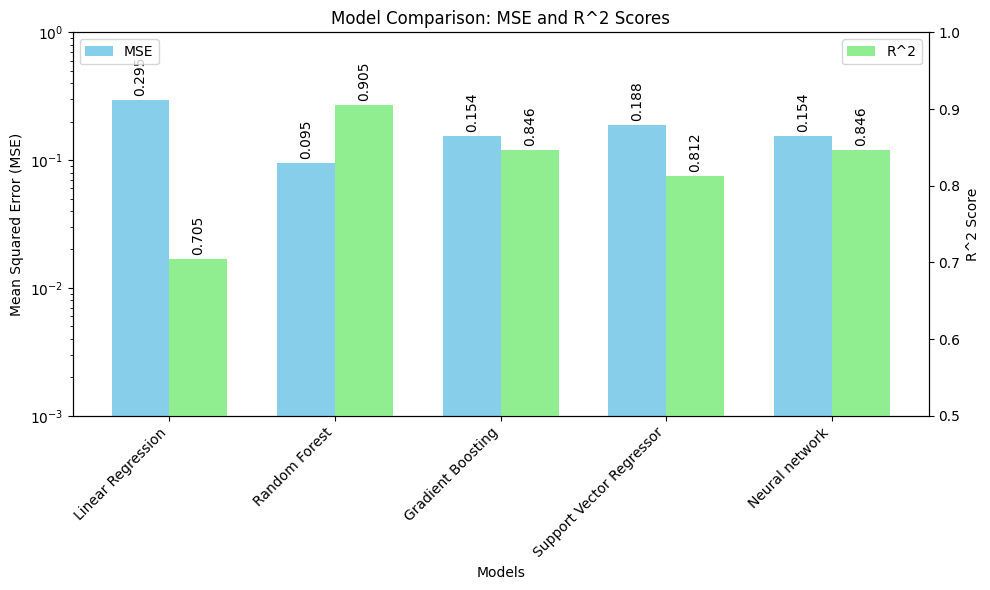

In [18]:
# Создаем фигуру с двумя осями Y
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Ширина столбцов
width = 0.35

# Позиции для столбцов
x = np.arange(len(df_results))

# Создаем столбцы для MSE и R^2
rects1 = ax1.bar(x - width/2, df_results['MSE'], width, label='MSE', color='skyblue')
rects2 = ax2.bar(x + width/2, df_results['R^2'], width, label='R^2', color='lightgreen')

# Настройка осей и меток
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax2.set_ylabel('R^2 Score')

ax1.set_xticks(x)
ax1.set_xticklabels(df_results['Model'], rotation=45, ha='right')

ax1.set_yscale('log')  # Логарифмическая шкала для MSE
ax1.set_ylim(1e-3, 1)  # Устанавливаем пределы для MSE
ax2.set_ylim(0.5, 1)   # Устанавливаем пределы для R^2

# Добавляем значения на столбцы
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1, ax1)
autolabel(rects2, ax2)

# Добавляем легенду
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Model Comparison: MSE and R^2 Scores')
plt.tight_layout()
plt.show()

# Conclusion for the model without job title


**Linear Regression**
- MSE: 0.295313
- R^2: 0.704687 
- демонстрирует наихудшие результаты среди всех моделей, но все еще показывает приемлемую производительность.


**Random Forest** 
- MSE: 0.094947
- R^2: 0.905053
- показывает наименьшее MSE (0.094947), что значительно лучше остальных моделей и имеет наивысший R^2 (0.905053), объясняя более 90% вариации в данных.

**Gradient Boosting**
- MSE: 0.154006
- R^2: 0.845994
- объясняют около 84.6% вариации.


**Support Vector Regressor**
- MSE: 0.187931
- R^2: 0.812069

**Neural Network**
- MSE: 0.153885
- R^2: 0.846115
- объясняют около 84.6% вариации.


Выводы:
- Все модели имеют MSE меньше 0.3, что хорошо для стандартизированных данных.
- Все модели имеют R^2 выше 0.7, что указывает на хорошую объяснительную способность.
- Neural Network и Gradient Boosting показывают очень близкие результаты, объясняя около 84.6% вариации.


### Model with job_title

In [19]:
df_job_title = pd.get_dummies(df, columns=['job_title'], drop_first=True)
print(df_job_title.shape)
df_job_title.head()

(6702, 197)


,age,gender,education_level,experience,salary,job_title_Accountant,job_title_Administrative Assistant,job_title_Back end Developer,job_title_Business Analyst,job_title_Business Development Manager,...,job_title_Supply Chain Manager,job_title_Technical Recruiter,job_title_Technical Support Specialist,job_title_Technical Writer,job_title_Training Specialist,job_title_UX Designer,job_title_UX Researcher,job_title_VP of Finance,job_title_VP of Operations,job_title_Web Developer
0,32.0,0.0,2.0,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,1.0,3.0,3.0,65000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,0.0,4.0,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,1.0,2.0,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,0.0,3.0,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
X = df_job_title.drop('salary', axis=1)
y = df_job_title['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler.fit_transform(y_test.values.reshape(-1, 1)).flatten()

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural network': MLPRegressor(random_state=42, max_iter=1000)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R^2': r2})

df_results = pd.DataFrame(results)
print(df_results)

                      Model           MSE           R^2
0         Linear Regression  1.645485e+23 -1.645485e+23
1             Random Forest  2.497516e-02  9.750248e-01
2         Gradient Boosting  9.596448e-02  9.040355e-01
3  Support Vector Regressor  1.298386e-01  8.701614e-01
4            Neural network  7.883991e-02  9.211601e-01


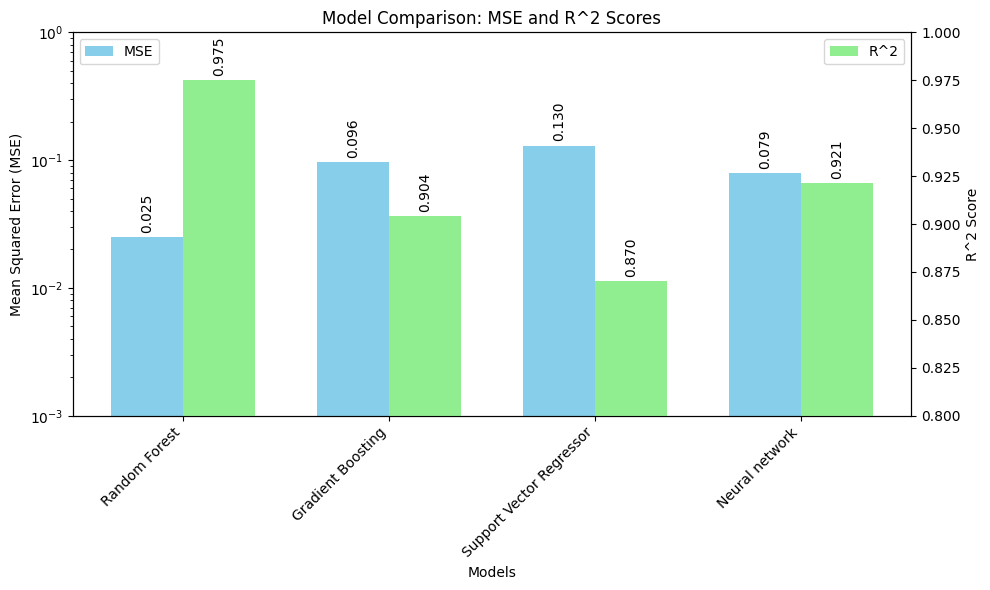

In [23]:
# Исключаем линейную регрессию
df_results = df_results[df_results['Model'] != 'Linear Regression']

# Создаем фигуру с двумя осями Y
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Ширина столбцов
width = 0.35

# Позиции для столбцов
x = np.arange(len(df_results))

# Создаем столбцы для MSE и R^2
rects1 = ax1.bar(x - width/2, df_results['MSE'], width, label='MSE', color='skyblue')
rects2 = ax2.bar(x + width/2, df_results['R^2'], width, label='R^2', color='lightgreen')

# Настройка осей и меток
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax2.set_ylabel('R^2 Score')

ax1.set_xticks(x)
ax1.set_xticklabels(df_results['Model'], rotation=45, ha='right')

ax1.set_yscale('log')  # Логарифмическая шкала для MSE
ax1.set_ylim(1e-3, 1)  # Устанавливаем пределы для MSE
ax2.set_ylim(0.8, 1)   # Устанавливаем пределы для R^2

# Добавляем значения на столбцы
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1, ax1)
autolabel(rects2, ax2)

# Добавляем легенду
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Model Comparison: MSE and R^2 Scores')
plt.tight_layout()
plt.show()



# Conclusion for the model with job title

**Linear Regression:**
- MSE: 1.645485e+23
- R^2: -1.645485e+23 
- Показывает экстремально плохие результаты. Огромное положительное значение MSE(1.645485e+23)и огромное отрицательное значение R^2(-1.645485e+23) указывают на серьезные проблемы с моделью. Возможно, есть проблемы с мультиколлинеарностью, или данные имеют сильно нелинейную природу.

**Random Forest:**
- MSE: 2.497516e-02
- R^2: 9.750248e-01
- Демонстрирует исключительно высокую производительность с очень низким MSE(2.497516e-02) и R^2(9.750248e-01), близким к 1.
Объясняет более 97% вариации в данных.


**Gradient Boosting:**
- MSE: 9.596448e-02
- R^2: 9.040355e-01
- Демонстрирует хорошие результаты, немного уступая Neural Network.
R^2 выше 0.9 также указывает на высокую точность модели.


**Support Vector Regressor:**
- MSE: 1.298386e-01
- R^2: 8.701614e-01
Показывает хорошие результаты, но уступает другим нелинейным моделям.
Тем не менее, R^2 близок к 0.87, что все еще является хорошим показателем.


**Neural Network:**
- MSE: 7.883991e-02 
- R^2: 9.211601e-01
- Показывает второй лучший результат после Random Forest.
Высокий R^2 (0.9211601) указывает на очень хорошую объяснительную способность.


Выводы:
- Random Forest является явным лидером среди всех моделей, значительно превосходя остальные по точности предсказаний.
- Neural Network и Gradient Boosting также показывают отличные результаты, хотя и уступают Random Forest.
- Linear Regression полностью не подходит для этих данных. Необходимо исследовать причины такой плохой производительности.
- Все нелинейные модели (Random Forest, Neural Network, Gradient Boosting, SVR) показывают очень хорошие результаты, что указывает на нелинейную природу зависимостей в данных.


# Comparison of the best performance of models

### Model with job title:
**Random Forest:**
- MSE: 2.497516e-02
- R^2: 9.750248e-01

### Model without job title:
**Random Forest** 
- MSE: 0.094947
- R^2: 0.905053

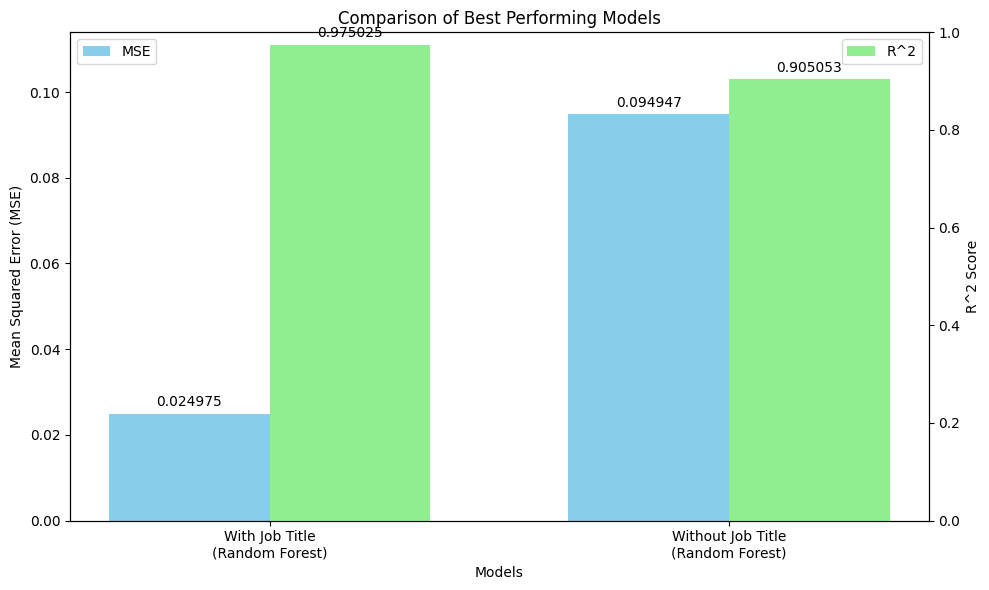

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
models = ['With Job Title\n(Random Forest)', 'Without Job Title\n(Random Forest)']
mse = [2.497516e-02, 0.094947]
r2 = [9.750248e-01, 0.905053]

# Создаем фигуру с двумя осями Y
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Ширина столбцов
width = 0.35

# Позиции для столбцов
x = np.arange(len(models))

# Создаем столбцы для MSE и R^2
rects1 = ax1.bar(x - width/2, mse, width, label='MSE', color='skyblue')
rects2 = ax2.bar(x + width/2, r2, width, label='R^2', color='lightgreen')

# Настройка осей и меток
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax2.set_ylabel('R^2 Score')

ax1.set_xticks(x)
ax1.set_xticklabels(models)

ax1.set_ylim(0, max(mse) * 1.2)  # Устанавливаем пределы для MSE
ax2.set_ylim(0, 1)  # Устанавливаем пределы для R^2

# Добавляем значения на столбцы
def autolabel(rects, ax, fmt='{:.6f}'):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(fmt.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2, fmt='{:.6f}')

# Добавляем легенду
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Comparison of Best Performing Models')
plt.tight_layout()
plt.show()

**Модель Random Forest с учетом job title** демонстрирует лучшую производительность по обеим метрикам:
- MSE примерно в 3.8 раза меньше (что означает меньшую ошибку предсказания)
- R^2 выше на 0.07 (что означает, что модель объясняет на 7% больше вариации в данных)

Это говорит о том, что включение информации о должности (job title) в модель значительно улучшает ее предсказательную способность.